In [1]:
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
!pip install torch_geometric
### Uncomment line below if in Google Colab environment
!chmod 777 /usr/local/lib/python3.9/dist-packages/BregmanTests/install_algos.sh
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FelipeSchreiber/BregmanClustering.git to /tmp/pip-req-build-d24t_jc9
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/BregmanClustering.git /tmp/pip-req-build-d24t_jc9
  Resolved https://github.com/FelipeSchreiber/BregmanClustering.git to commit 387185715d831523184041b58212551d0a43d536
  Preparing metadata (setup.py) ... done
  Created wheel for bregClust: filename=bregClust-1.0-py3-none-any.whl size=24536 sha256=8ec2c557c6afad89541cf2756614fd326fa86aec53fd000ff6980a4cb55e7f6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-rdzq9wyb/wheels/6f/8f/ab/2faa84d8b9fad58989d72cda12225f6191888313b2d42f6ad5
Successfully built bregClust
  Attempting uninstall: bregClust
    Found existing installation: bregClust 1.0
    Uninstalling bregClust-1.0:
      Successfully uninstalled bregClust-1.0
Looking in indexes: https://pypi.org

In [2]:
from BregmanTests.benchmark import *
n_average = 1
n = 300
n_clusters = 3
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"


Installing R packages...
 This step takes about 5 min...



(as ‘lib’ is unspecified)

















	‘/tmp/RtmpdoMA2Z/downloaded_packages’



Initialisation chosen from the graph
number of iterations :  25
Initialisation chosen from the graph
number of iterations :  25
Initialisation chosen from the graph
number of iterations :  25
Initialisation chosen from the graph
number of iterations :  25
Initialisation chosen from the attributes
number of iterations :  25
Initialisation chosen from the attributes
number of iterations :  25
Initialisation chosen from the graph
number of iterations :  25
Initialisation chosen from the graph
number of iterations :  25
Initialisation chosen from the graph
number of iterations :  25
Initialisation chosen from the graph
number of iterations :  25
Initialisation chosen from the attributes
number of iterations :  25
Initialisation chosen from the attributes
number of iterations :  25
[[-0.0062599   0.01339999]
 [ 0.09768999  0.00954718]
 [ 0.83631316  0.84606976]]


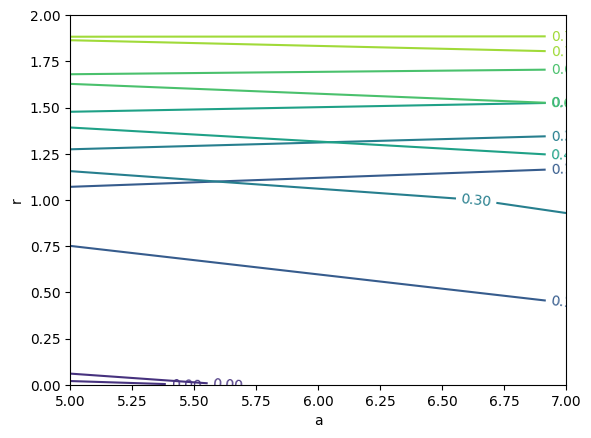

In [4]:
BregmanBenchmark(att_variance=1,\
                    attributes_distribution=attributes_distribution,\
                    weight_variance=1,\
                    weight_distribution=weight_distribution,\
                    edge_distribution=edge_distribution)\
                  .run_contour(n_average=1,\
                            cluster_sizes=sizes,\
                            b=5,\
                            a_range=[5,7],\
                            r_range = [ 0,1,2],\
                            dense=False,\
                            binary=True,\
                            plot_3d=False)

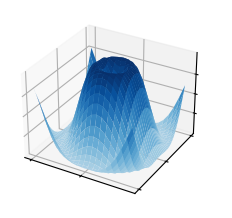

In [10]:
from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

In [11]:
X.shape,Y.shape,Z.shape

((40, 20), (40, 20), (40, 20))

In [8]:
X = np.arange(-5, 5, 0.25)


In [9]:
X.shape

(40,)